<center>
    <img src="https://gitlab.com/ibm/skills-network/courses/placeholder101/-/raw/master/labs/module%201/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>


# **Hands-on Lab : Web Scraping**


Estimated time needed: **30 to 45** minutes


## Objectives


In this lab you will perform the following:


-   Extract information from a given web site 
-   Write the scraped data into a csv file.


## Extract information from the given web site

You will extract the data from the below web site: <br> 


In [1]:
#this url contains the data you need to scrape
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/datasets/Programming_Languages.html"

The data you need to scrape is the **name of the programming language** and **average annual salary**.<br> It is a good idea to open the url in your web broswer and study the contents of the web page before you start to scrape.


Import the required libraries


In [2]:
# Your code here
from bs4 import BeautifulSoup 
import requests

Download the webpage at the url


In [3]:
#your code goes here
data = requests.get(url).text

Create a soup object


In [4]:
#your code goes here
soup = BeautifulSoup(data,'html5lib')

Scrape the `Language name` and `annual average salary`.


In [5]:
#your code goes here
table = soup.find('table')
l1 = []
l2 = []
for row in table.find_all('tr'):
    cols = row.find_all('td')
    langn = cols[1].getText()
    anavgsal = cols[3].getText()
    l1.append(langn)
    l2.append(anavgsal)
    print(f"{langn}------------------->{anavgsal}")

Language------------------->Average Annual Salary
Python------------------->$114,383
Java------------------->$101,013
R------------------->$92,037
Javascript------------------->$110,981
Swift------------------->$130,801
C++------------------->$113,865
C#------------------->$88,726
PHP------------------->$84,727
SQL------------------->$84,793
Go------------------->$94,082


In [6]:
# your code goes here
import pandas as pd

sal_df=pd.DataFrame({'Language': l1, 'Average Annual Salary': l2})
sal_df.drop([0],axis = 0,inplace = True)

sal_df

,Language,Average Annual Salary
1,Python,"$114,383"
2,Java,"$101,013"
3,R,"$92,037"
4,Javascript,"$110,981"
5,Swift,"$130,801"
6,C++,"$113,865"
7,C#,"$88,726"
8,PHP,"$84,727"
9,SQL,"$84,793"
10,Go,"$94,082"


In [7]:
sal_df['Average Annual Salary']=sal_df['Average Annual Salary'].str.replace(",","").str.replace("$"," ").astype('int64')
sal_df

,Language,Average Annual Salary
1,Python,114383
2,Java,101013
3,R,92037
4,Javascript,110981
5,Swift,130801
6,C++,113865
7,C#,88726
8,PHP,84727
9,SQL,84793
10,Go,94082


In [8]:
sal_df.sort_values('Average Annual Salary',ascending = False,inplace = True)
sal_df
sal_df.reset_index(drop = True,inplace =True)

In [9]:
sal_df

,Language,Average Annual Salary
0,Swift,130801
1,Python,114383
2,C++,113865
3,Javascript,110981
4,Java,101013
5,Go,94082
6,R,92037
7,C#,88726
8,SQL,84793
9,PHP,84727


Save the scrapped data into a file named _popular-languages.csv_


In [10]:
sal_df.to_csv("popular-languages.csv")

In [11]:
import pandas as pd
mdf = pd.read_csv('popular-languages.csv')
mdf.drop('Unnamed: 0',axis = 1,inplace=True)
mdf = mdf.set_index('Language')

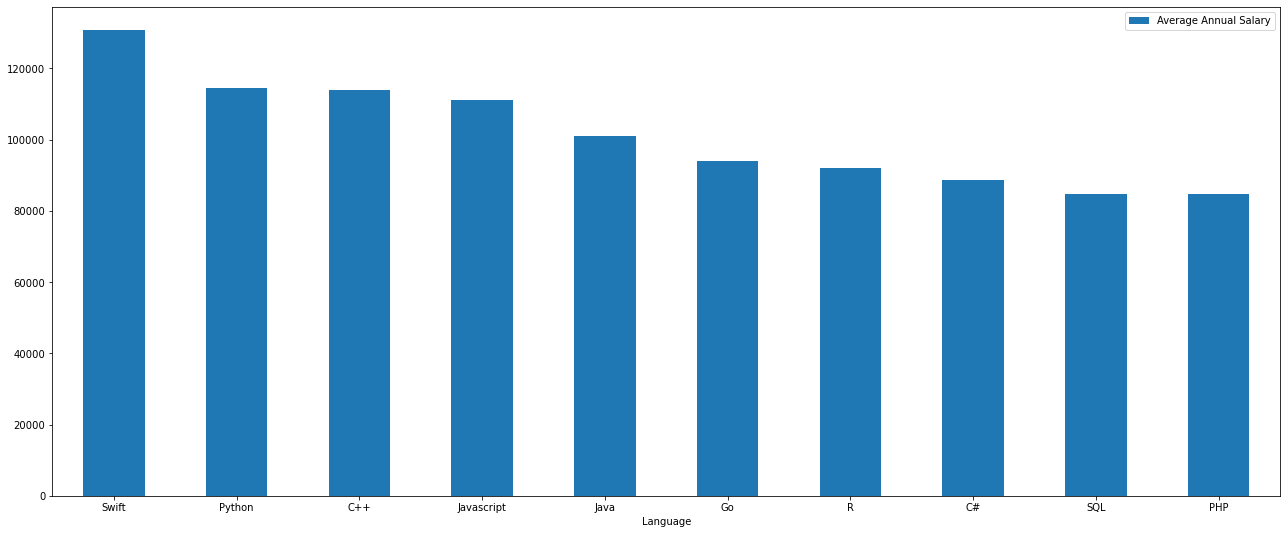

In [12]:
# mdf.drop('index',axis = 1,inplace = True)

import matplotlib.pyplot as plt

mdf.plot(kind = 'bar',figsize = (22,9))
plt.xticks(rotation = 0)
plt.show()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
